In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.optimizers import Adam

In [3]:

train = pd.read_csv('train.csv')
validate = pd.read_csv('Dig-MNIST.csv')

In [4]:

print(train.shape)
print(validate.shape)
print(type(train))

(60000, 785)
(10240, 785)
<class 'pandas.core.frame.DataFrame'>


In [5]:

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\yongc\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='label'>

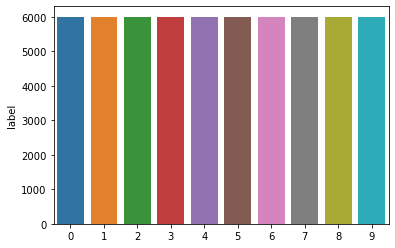

In [6]:

y = train.label.value_counts()
sns.barplot(y.index, y)

In [7]:

train_images = train.drop('label', axis = 1)
train_labels = train.label
val_images = validate.drop('label', axis = 1)
val_labels = validate.label

In [8]:

train_images = train_images / 255 #0~255     0~1
val_images = val_images / 255

In [9]:

train_images=train_images.values.reshape(-1, 28, 28, 1) #60000*28*28*1
val_images=val_images.values.reshape(-1, 28, 28, 1)

In [10]:
train_images.shape

(60000, 28, 28, 1)

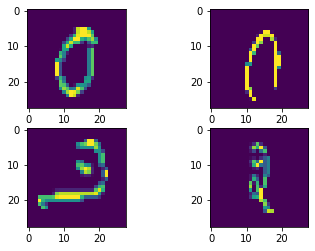

In [11]:

plt.figure()
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(train_images[i][:, :, 0])
plt.show()

In [12]:

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In [13]:

train_images,test_images,train_labels,test_labels = train_test_split(train_images, train_labels, 
                                                                     random_state = 0, test_size = 0.2) #y = 3x+2 20% 80%

In [14]:

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same',
                activation = 'relu', input_shape = (28, 28, 1)))   
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [15]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          2

In [16]:

optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
model.compile(optimizer = optimizer,loss = ['categorical_crossentropy'],metrics = ['accuracy'])

In [17]:

epochs =  3
batch_size = 64

In [18]:
train_imgages = train_images.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
test_imgages = test_images.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

AttributeError: 'numpy.ndarray' object has no attribute 'prefetch'

In [19]:

history = model.fit(train_images, train_labels,
                   batch_size = batch_size, epochs = epochs,
                   validation_data = (test_images,test_labels))

Epoch 1/3
750/750 [==============================] - 24s 32ms/step - loss: 0.3068 - accuracy: 0.8975 - val_loss: 0.0466 - val_accuracy: 0.9855
Epoch 2/3
750/750 [==============================] - 24s 31ms/step - loss: 0.0817 - accuracy: 0.9755 - val_loss: 0.0294 - val_accuracy: 0.9908
Epoch 3/3
750/750 [==============================] - 24s 31ms/step - loss: 0.0621 - accuracy: 0.9810 - val_loss: 0.0265 - val_accuracy: 0.9911


Text(0, 0.5, 'accuracy')

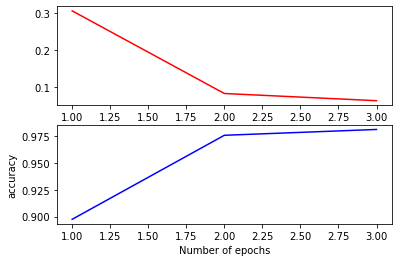

In [20]:

fig,ax = plt.subplots(2, 1)
fig.set
x = range(1,1 + epochs)
ax[0].plot(x,history.history['loss'],color = 'red')

ax[1].plot(x,history.history['accuracy'],color = 'blue')

plt.xlabel('Number of epochs')
plt.ylabel('accuracy')

In [33]:
history.history

{'loss': [0.3068276643753052, 0.08173087239265442, 0.062098149210214615],
 'accuracy': [0.8974999785423279, 0.9755416512489319, 0.9809583425521851],
 'val_loss': [0.046579908579587936, 0.029408127069473267, 0.02651899680495262],
 'val_accuracy': [0.9854999780654907, 0.9908333420753479, 0.9910833239555359]}

In [21]:
prediction = model.predict(val_images)
prediction = np.argmax(prediction, axis = 1)
true_label = np.argmax(val_labels, axis = 1)

     0    1    2    3    4    5    6    7    8    9
0  626   35   94   23    2   19    8    9   32  176
1  172  695   70    4    3   31    0    7   30   12
2   10    1  944    4    7   34    5    0    8   11
3    9    1   76  469    6  342   22   86    2   11
4    2    6   25    3  738   44    3    1   66  136
5    0    4    1    1   10  969    1    0   37    1
6    2    0   15    2   27   41  757   31   16  133
7    2    1   23    3    2   12  293  656   10   22
8    6    3   55    0    1   11   11    0  791  146
9    0    2    4    0    0    4   55    9   22  928


<function matplotlib.pyplot.show(close=None, block=None)>

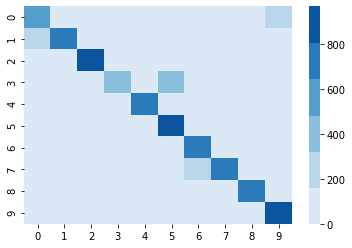

In [27]:
cm = confusion_matrix(true_label, prediction)
cm = pd.DataFrame(cm,index=range(0,10),columns=range(0,10))
print(cm)
cmap = sns.color_palette('Blues')
sns.heatmap(cm,cmap = cmap)
plt.show

In [23]:
pre_result = (prediction - true_label == 0).tolist()

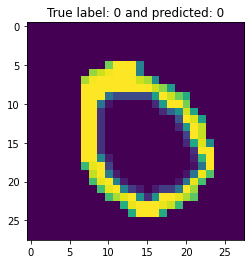

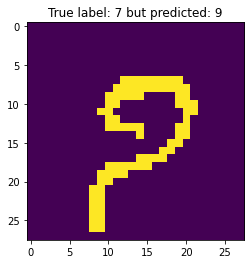

In [24]:
for i in range(len(pre_result)):
    if pre_result[i] == True:
        plt.figure()
        plt.imshow(val_images[i][:, :, 0])
        plt.title('True label: ' + str(true_label[i]) + ' and predicted: ' + str(prediction[i]))
        break

for i in range(len(pre_result)):
    if pre_result[i] == False:
        plt.figure()
        plt.imshow(val_images[i][:, :, 0])
        plt.title('True label: ' + str(true_label[i]) + ' but predicted: ' + str(prediction[i]))
        break